# EDA - Haberman's Cancer Survival Dataset

Haberman Cancer Survival data set: The data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### The Attributes contains following information
AGE    :- Age of patient at the time of operation   
YEAR   :- Patient’s year of operation  
NODES  :- Number of positive axillary nodes detected  
STATUS :- Survival status :  
          1 = the patient survived 5 years or longer  
          2 = the patient died within 5 years

Our goal is to analyze the dataset and identify patterns that can help us gain a deeper understanding of the data. By doing so, we can utilize this knowledge to select an appropriate machine learning algorithm for predicting the survival rates of patients who undergo surgery.

For primary understanding we can find below relationship and answer to questions:

- There exist relationship between the patient's age and survival status?
- There is any relationship between the number of positive axillary nodes and survival status?
- What effect has an operation on a patient's survival status?
- What are the trends in the number of operations over the years?
- With the given daaset and findings, how likely is it to predict a patient's survival status effectively?

In [1]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore") 

# Configure Seaborn.
sns.set_style("whitegrid")
sns.set_palette("muted") 
sns.set_context("paper", font_scale=1.5)

In [2]:
import pandas as pd

In [3]:
hm = pd.read_csv("haberman.csv")
hm


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1


**From above dataset it could be undersood that age, year, nodes are factors/variables that are independent and Status is dependent factor/variable** 

In [4]:
hm.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
hm.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


**It can be understood that max age in the data set is 78 and min age is 30 for patients undergone operation. 25% people are of age less than 44, 50% are less than age 53 and 75% patient are of age less than 60.
Same thing can be understood in other features like year and nodes** 

In [6]:
type(hm)

pandas.core.frame.DataFrame

In [7]:
print("Shape of the Given Data Set : {} ".format(hm.shape))

Shape of the Given Data Set : (305, 4) 


**The Dataset contains 305 rows and 4 columns**  

In [8]:
hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### From Above info  
**All the 4 columns have variable type integer values
Non-null count for all features is equal to the number of records, hence the dataset contains no missing values, and there's no need for data imputation.   
All features are of int64 data type. Since status is a binary feature, we have to convert its type.   
The dataset memory usage (RAM) is ~10kb**


In [9]:
# Convert status to a categorical variable
hm["status"] = hm["status"].astype("category")
hm["status"].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [10]:
hm['status'].sample(5)

69     1
302    1
247    1
185    1
240    2
Name: status, dtype: category
Categories (2, int64): [1, 2]

### To Add column indicating stage of cancer
Cancer stages provide information about the severity and progression of the disease. They are crucial for determining a patient's prognosis and treatment approach. The TNM system, which evaluates tumor size, lymph node involvement, and metastasis, is commonly used by doctors to determine the stage of breast cancer.

- **N0**: Cancer has not spread to the lymph nodes.
- **N1**: Micrometastases or cancerous cells are present in 1–3 axillary lymph nodes or the nodes inside the breast.
- **N2**: In this stage, 4–9 axillary lymph nodes have cancerous cells.
- **N3**: In this stage, more than 10 axillary lymph nodes have cancerous cells.

In [11]:
# Let's add new column `stages` to the dataset

conditions = [
    (hm["nodes"] == 0),
    (hm["nodes"] <= 3),
    (hm["nodes"] <= 9),
    (hm["nodes"] >= 10)
]

stages = ["N0", "N1", "N2", "N3"]

hm["stages"] = np.select(conditions, stages)

In [12]:
# check if the creation was successfull by getting random sample of stages
hm[["nodes","stages"]].sample(5)

,nodes,stages
153,0,N0
41,0,N0
55,0,N0
51,0,N0
86,0,N0


In [13]:
hm.head(10)

,age,year,nodes,status,stages
0,30,64,1,1,N1
1,30,62,3,1,N1
2,30,65,0,1,N0
3,31,59,2,1,N1
4,31,65,4,1,N2
5,33,58,10,1,N3
6,33,60,0,1,N0
7,34,59,0,2,N0
8,34,66,9,2,N2
9,34,58,30,1,N3


In [14]:
hm.tail(10)

,age,year,nodes,status,stages
295,72,64,0,1,N0
296,72,67,3,1,N1
297,73,62,0,1,N0
298,73,68,0,1,N0
299,74,65,3,2,N1
300,74,63,0,1,N0
301,75,62,1,1,N1
302,76,67,0,1,N0
303,77,65,3,1,N1
304,78,65,1,2,N1


In [15]:
hm.sample(10)

,age,year,nodes,status,stages
205,57,64,0,1,N0
204,57,63,0,1,N0
27,38,60,0,1,N0
226,60,67,2,1,N1
115,49,64,10,2,N3
265,65,59,2,1,N1
292,71,68,2,1,N1
170,54,68,7,2,N2
207,57,67,0,1,N0
142,52,69,3,2,N1


**Used "Head" , "Tail" and "Sample" to check top 10 , bottom 10 and random 10 rows of data** 

## Discriptive Statistical Analysis

In [16]:
status_count = hm['status'].value_counts()
status_count

status
1    225
2     80
Name: count, dtype: int64

In [17]:
hm['status'].value_counts(normalize = True)

status
1    0.737705
2    0.262295
Name: proportion, dtype: float64

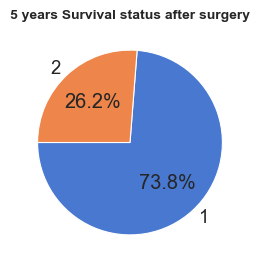

In [18]:
plt.figure(figsize=(3,3))
plt.title('5 years Survival status after surgery',fontsize=10, weight='bold')
plt.pie(status_count , labels=status_count.index, autopct='%1.1f%%', startangle=180);

**Since lables 1,2 do not give clear indication therefore we chage it to "Died" and "Survived"**

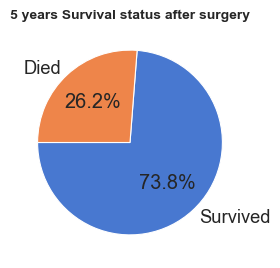

In [19]:
plt.figure(figsize=(3,3))
plt.title('5 years Survival status after surgery',fontsize=10, weight='bold')
plt.pie(status_count , labels=['Survived','Died'], autopct='%1.1f%%', startangle=180);

### Insights
**From above observation out of 305 patients 225 (73.8%) survied and 80 (26.2%) died after 5 years  
The dataset seems to be **imbalanced** since ~73% of records belong to the survivors class, and ~27% belongs to the deceased class.**


## EDA - Univariate Analysis 
## 1. AGE


In [20]:
hm['age'].describe()

count    305.000000
mean      52.357377
std       10.678010
min       30.000000
25%       44.000000
50%       52.000000
75%       60.000000
max       78.000000
Name: age, dtype: float64

In [21]:
Age_count = hm['age'].groupby(hm['age']).count().sort_values(ascending=False)
Age_count

age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
Name: age, dtype: int64

In [22]:
Age_count.head(10)

age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
Name: age, dtype: int64

**Top 10 higest count of patient lies between age range 43 to 65
We can also plot bargraph to better understand this**

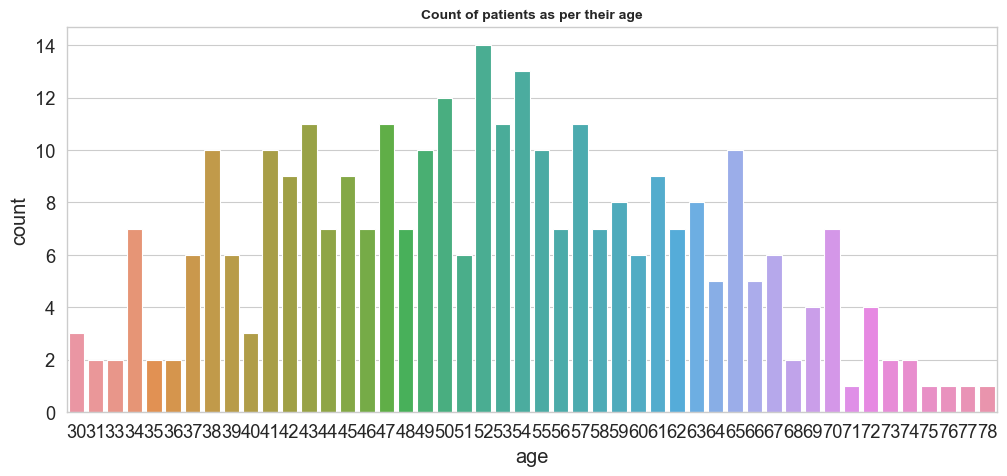

In [23]:
plt.subplots(figsize=(12,5))
sns.countplot(x='age', data=hm)
plt.title('Count of patients as per their age', fontsize=10, weight='bold');

**The Above bargraph gives indication that data (Age) is normally distributed, lets plot histogram for better understand**

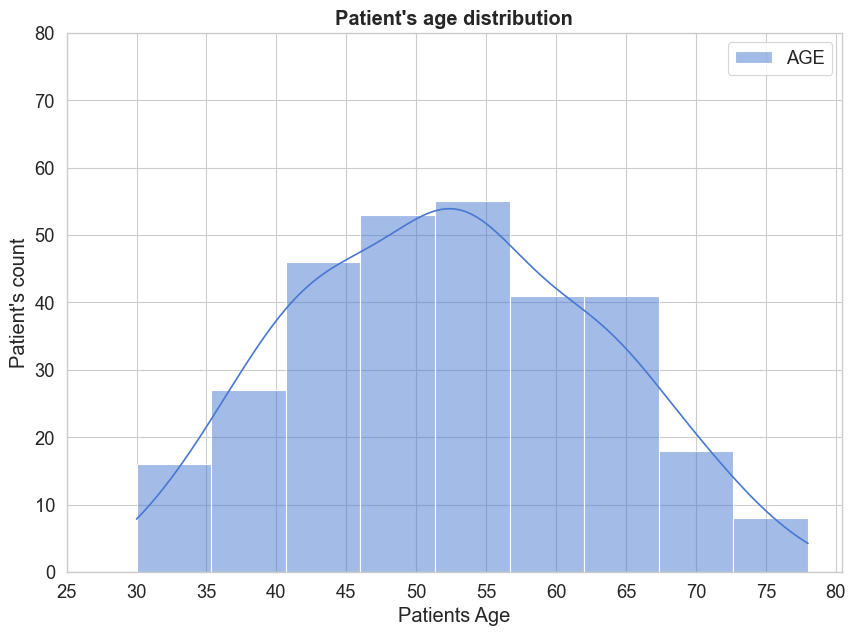

In [24]:
plt.figure(figsize=(10,7))

sns.histplot(hm, x="age", label="AGE", bins=9 , kde=True)

plt.xlabel("Patients Age")
plt.ylabel("Patient's count")
plt.title("Patient's age distribution", weight='bold')
plt.xticks(ticks=range(25,85,5))
plt.yticks(ticks=range(0,90,10))
plt.legend()

plt.savefig("02. Patient's age distribution.png")
plt.show()


### Insights
- All patients are aged between 30 and 78.
- The average patients age is 52.35.
- The median patients age is 52.
- 75% of all patients is 60 years or younger.
- Patients age is normally distributed - i.e. the distribution has a noticable bell curve.


## 2.YEAR OF OPERATION

In [25]:
hm["year"].describe()

count    305.000000
mean      62.868852
std        3.242783
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: year, dtype: float64

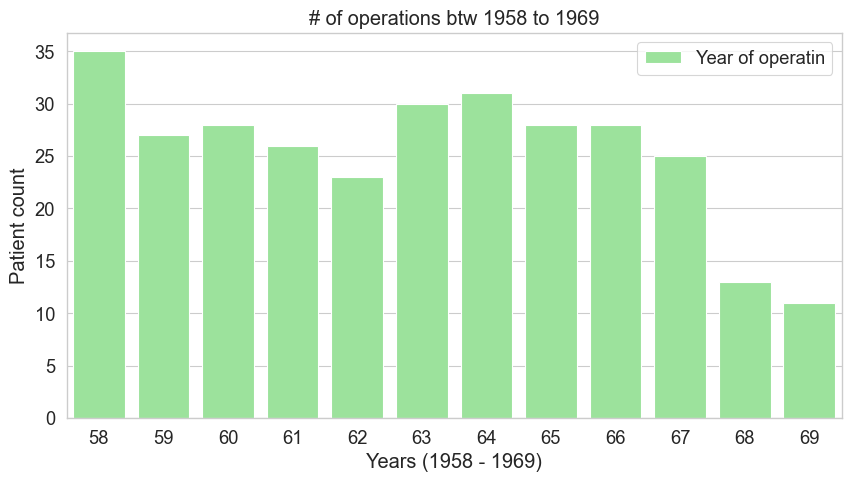

In [26]:
plt.figure(figsize=(10,5))

sns.countplot(data=hm, x="year", label="Year of operatin", color="lightgreen")
plt.xlabel("Years (1958 - 1969)")
plt.ylabel("Patient count")
plt.title("# of operations btw 1958 to 1969")
plt.legend()

plt.show()

In [27]:
split_age = 40

hm_group_1 = hm.loc[hm["age"] <= split_age] # younger patients
hm_group_2 = hm.loc[hm["age"] > split_age] # older patients
age_groups = [hm_group_1, hm_group_2]

print(hm_group_1.shape[0], hm_group_2.shape[0])

43 262


Insights

- The dataset exclusively contains records of operations conducted from 1958 to 1969.
- The highest number of operations, totaling 36, was performed in the year 1958.
- The lowest number of operations, amounting to 11, was recorded in 1969.
- There was a notable 50% decrease in the number of operations compared to 1958.
- Starting from 1963, younger patients aged 40 or below underwent a reduced number of surgeries.


## 3. Nodes

In [28]:
Node_count = hm['nodes'].groupby(hm['nodes']).count().sort_values(ascending=False)
Node_count

nodes
0     136
1      41
3      20
2      19
4      13
6       7
7       7
8       7
5       6
9       6
13      5
11      4
14      4
19      3
23      3
22      3
15      3
10      3
20      2
12      2
17      1
18      1
16      1
21      1
24      1
25      1
28      1
30      1
35      1
46      1
52      1
Name: nodes, dtype: int64

**Value 0 means no axillary nodes are affected by cancer cells, and greater than 0 represents number of axillary nodes affected by cancer cells, so lets filter out non affected nodes** 

In [29]:
Filter_nodes = hm["nodes"] > 0
affected_nodes = hm.loc[Filter_nodes, "nodes"]

In [30]:
Filter_nodes.value_counts()

nodes
True     169
False    136
Name: count, dtype: int64

In [31]:
affected_nodes.value_counts()


nodes
1     41
3     20
2     19
4     13
7      7
6      7
8      7
9      6
5      6
13     5
14     4
11     4
15     3
23     3
10     3
19     3
22     3
20     2
12     2
18     1
25     1
17     1
35     1
30     1
46     1
24     1
16     1
52     1
21     1
28     1
Name: count, dtype: int64

In [32]:
affected_nodes.describe()

count    169.000000
mean       7.278107
std        8.370131
min        1.000000
25%        2.000000
50%        4.000000
75%       10.000000
max       52.000000
Name: nodes, dtype: float64

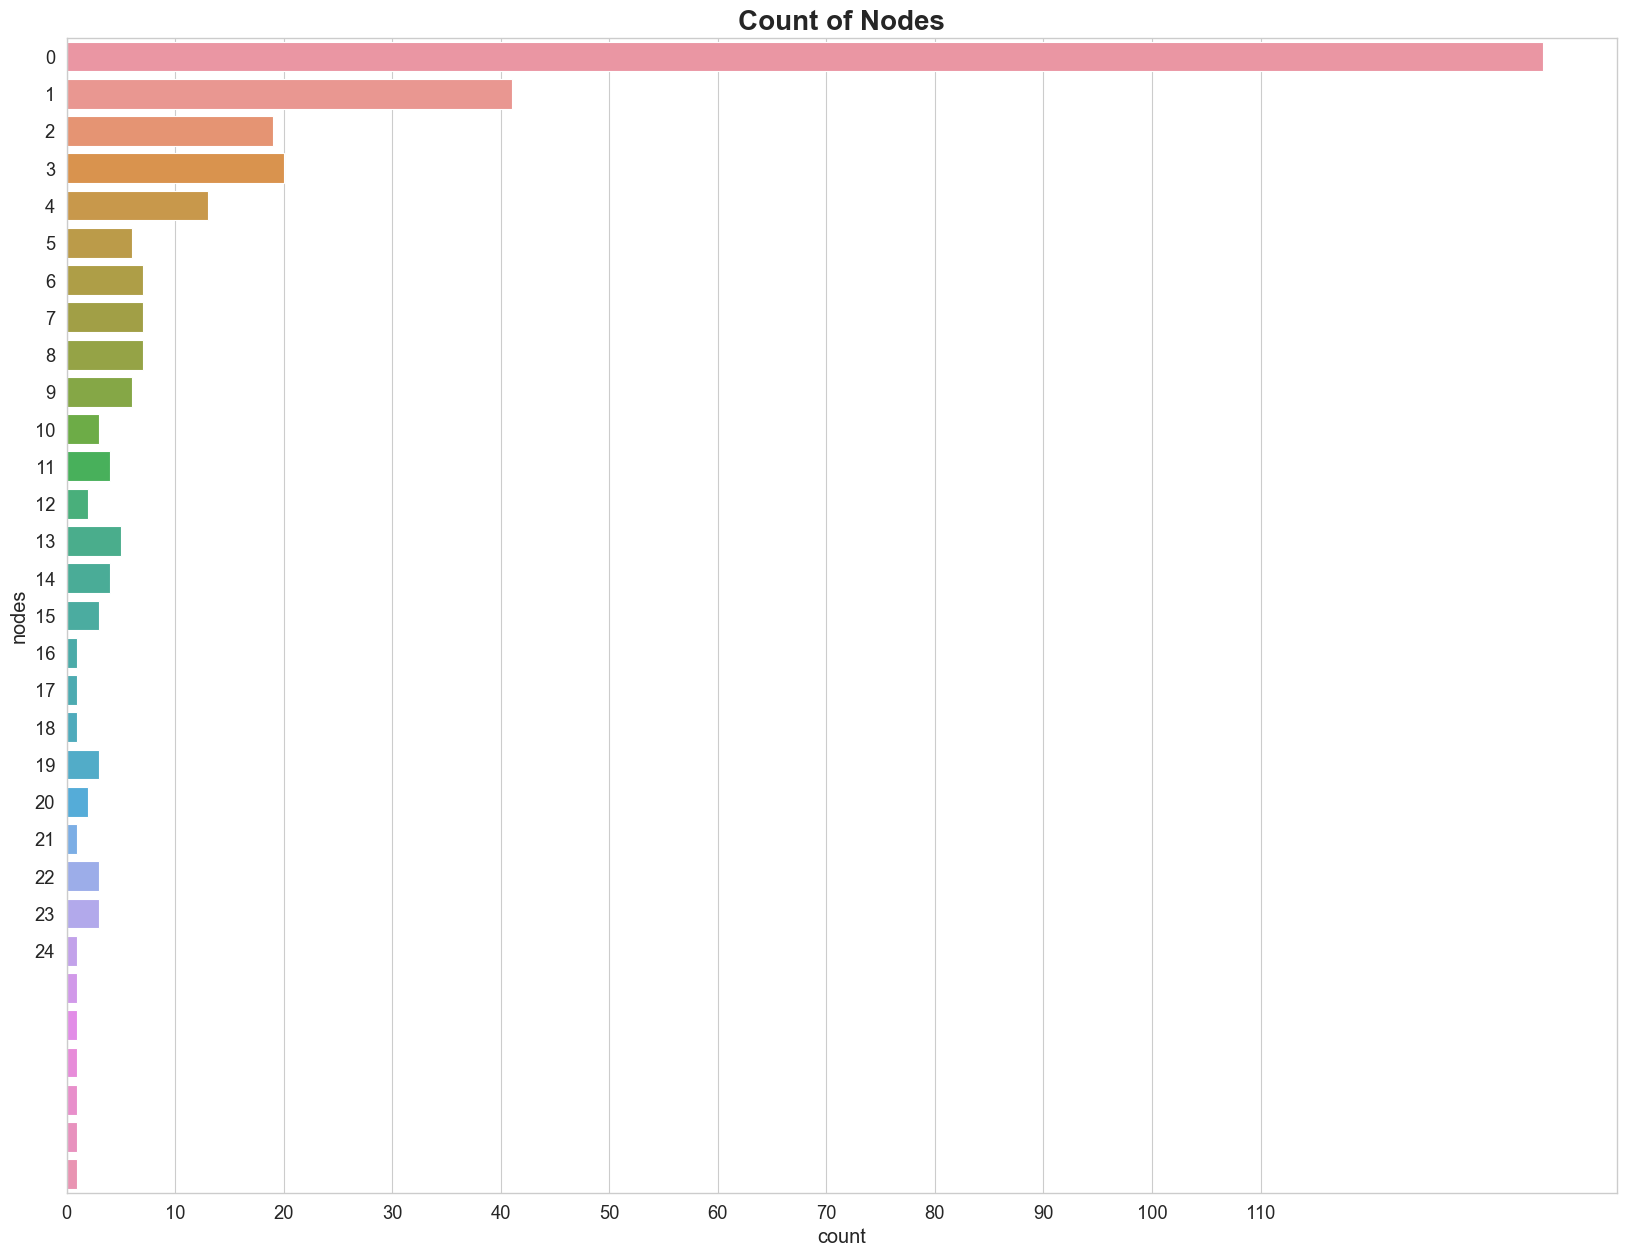

In [33]:
plt.figure(figsize=(20,15))
sns.countplot(y= "nodes", data=hm)
plt.xticks(ticks=range(0,120,10))
plt.yticks(ticks=range(0,25,1))
plt.title('Count of Nodes', fontsize=20, weight='bold');

**Visualizing by filtering out patients with no affected axillary node**

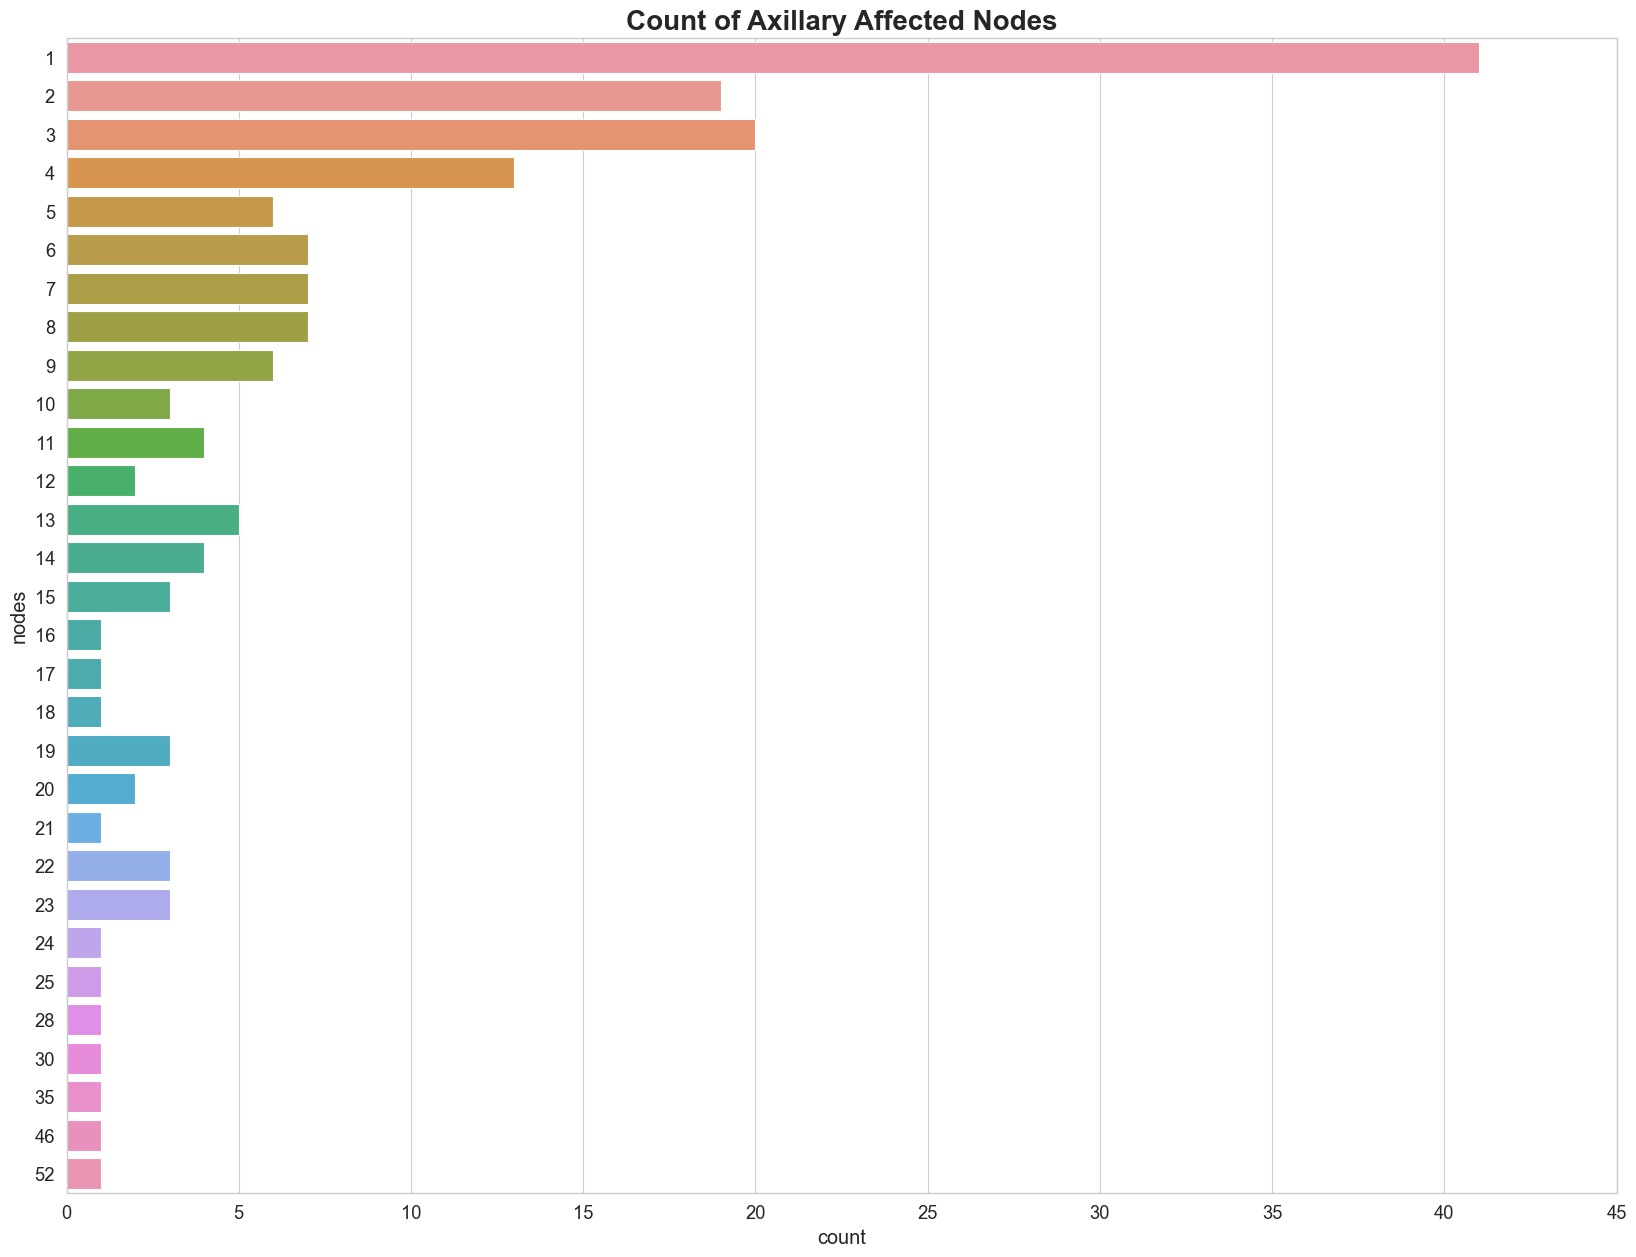

In [34]:
filter_affected = hm["nodes"] > 0

nodes_affected_hm = hm.loc[filter_affected]

plt.figure(figsize=(20,15))
sns.countplot(y = "nodes", data=nodes_affected_hm)
plt.xticks(ticks=range(0,50,5))
plt.yticks(ticks=range(0,30,1))
plt.title('Count of Axillary Affected Nodes', fontsize=20, weight='bold');

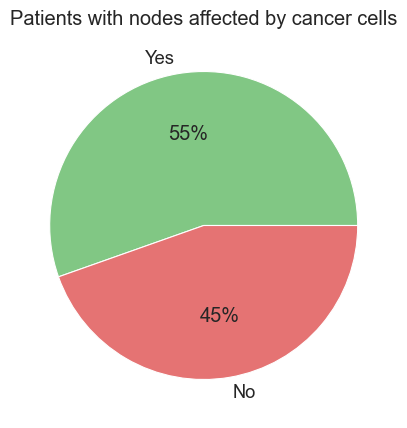

In [35]:
plt.figure(figsize=(5,5))
plt.pie(x=Filter_nodes.value_counts(), labels=["Yes", "No"], colors=["#81C784", "#E57373"], autopct="%1.0f%%")
plt.title("Patients with nodes affected by cancer cells")

plt.show()

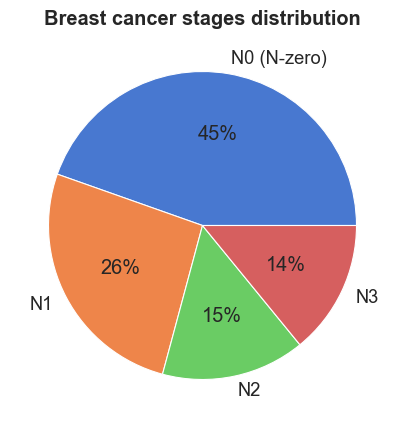

In [36]:
labels = ["N0 (N-zero)", "N1", "N2", "N3"]
plt.figure(figsize=(5,5))
plt.pie(x=hm["stages"].value_counts(), labels=labels, autopct="%1.0f%%")
plt.title("Breast cancer stages distribution", weight="bold")

plt.show()

### Insights
- Out of the total number of patients, 45% (136 patients) underwent surgery before the cancer affected their axillary lymph nodes.
- Conversely, 55% (169 patients) had cancer detected in their axillary lymph nodes before undergoing surgery.
- The maximum number of positive axillary nodes detected among the patients is 52.
- On average, patients diagnosed with breast cancer have 5.3 affected nodes.
- Among all patients, 26% are diagnosed with stage 1 (N1) breast cancer.
- 15% of all patients are diagnosed with stage 2 (N2) breast cancer.
- 14% of all patients are diagnosed with stage 3 (N3) breast cancer.

In [14]:
 hm[hm['nodes'] == hm['nodes'].max()]

,age,year,nodes,status
62,43,58,52,2


# Bivariate analysis
## 1.Age vs Status

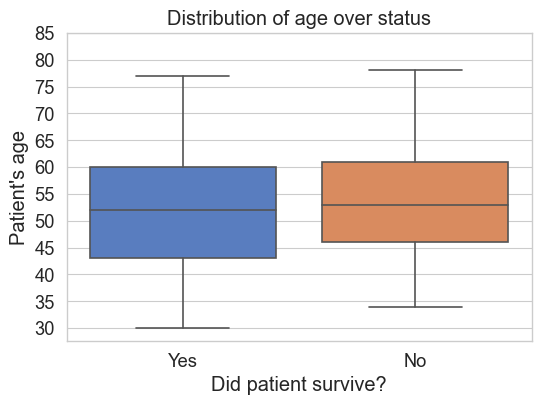

In [37]:
plt.figure(figsize=(6,4))

sns.boxplot(data=hm, x="status", y="age")

plt.title("Distribution of age over status")
plt.xlabel("Did patient survive?")
plt.ylabel("Patient's age")
plt.xticks(ticks=[0, 1], labels=["Yes", "No"])
plt.yticks(ticks=range(30, 90, 5))

plt.savefig("10. Distribution age over status.png")
plt.show()

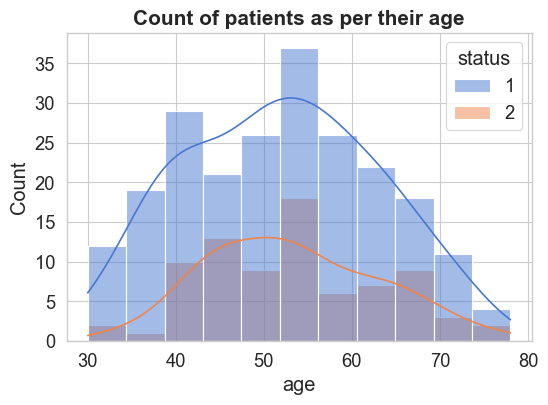

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(data=hm, hue = "status", x="age", kde=True)
plt.title('Count of patients as per their age', fontsize=15, weight='bold');

## Insights

**On comparing Age with staus we notice Both patient groups survived and died have a similar distribution, and it is normal distribution hence we cannot make any sort of inferences successfully**

## Axillary lymph nodes vs status

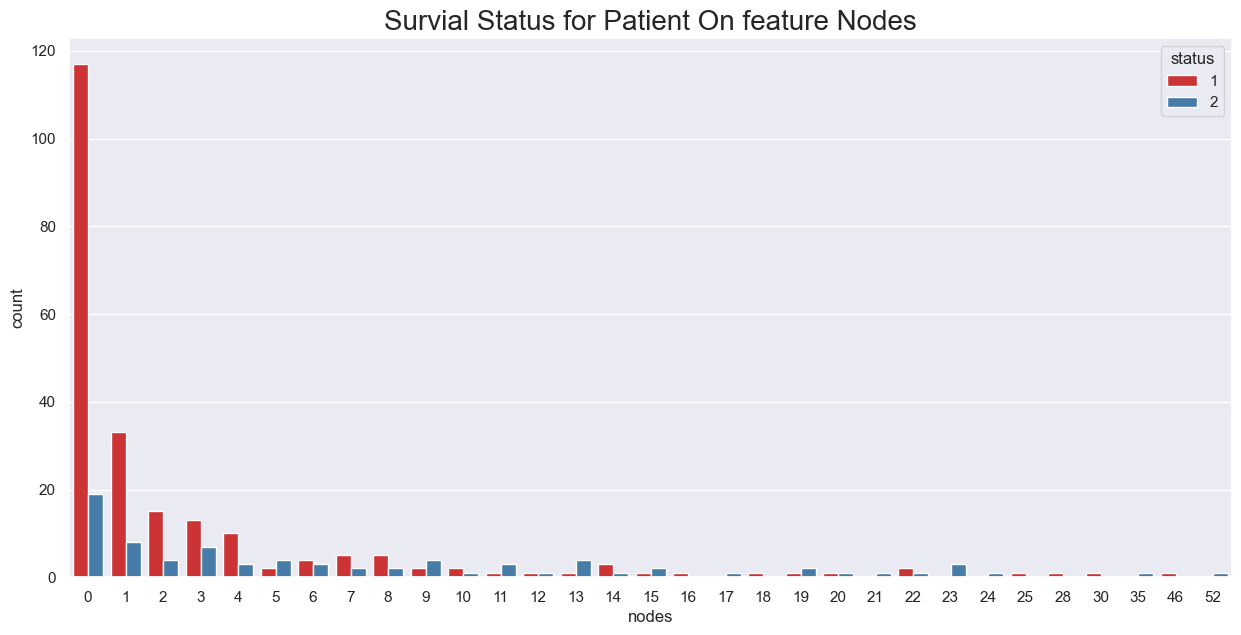

In [39]:
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x = 'nodes',hue = 'status',data = hm, palette='Set1')
plt.title('Survial Status for Patient On feature Nodes',fontsize=20);

**Visualizing survival status for patients wrt to affected axillary lymph node**

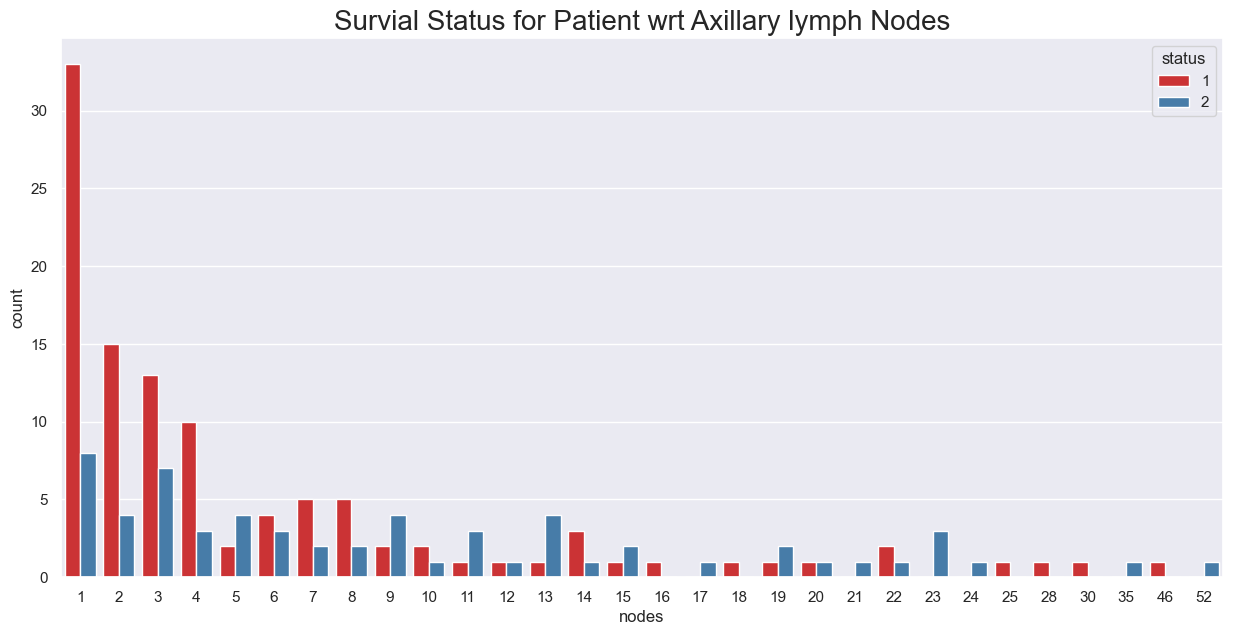

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'nodes',hue = 'status',data = nodes_affected_hm, palette='Set1')
plt.title('Survial Status for Patient wrt Axillary lymph Nodes',fontsize=20);

**On closely observing it can be seen that as nodes increases patients who died after operation increases with respect to survived ratio, but there could be some outliers also that cannot be identified here, so we need to have a box plot**

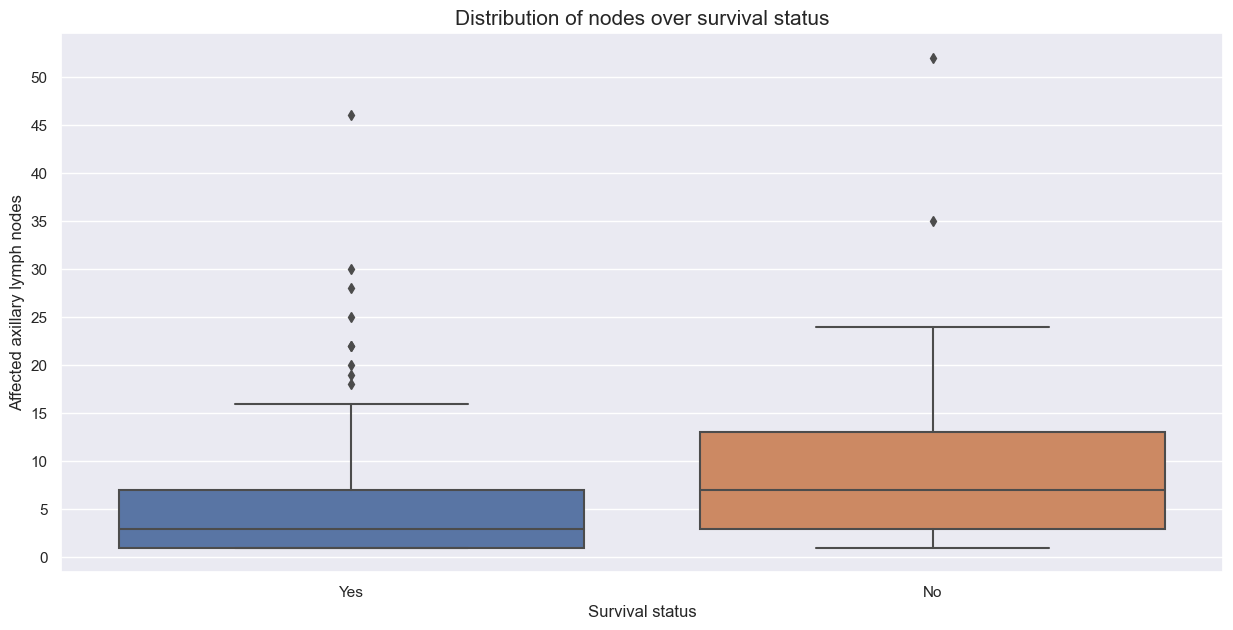

In [41]:
filter_affected = hm["nodes"] > 0

nodes_affected_hm = hm.loc[filter_affected]

sns.boxplot(data=nodes_affected_hm, x="status", y="nodes")
plt.title("Distribution of nodes over survival status", fontsize=15)
plt.xlabel("Survival status")
plt.ylabel("Affected axillary lymph nodes")
plt.yticks(ticks=range(0, 55, 5))
plt.xticks(ticks=[0, 1], labels=["Yes", "No"])

plt.show()

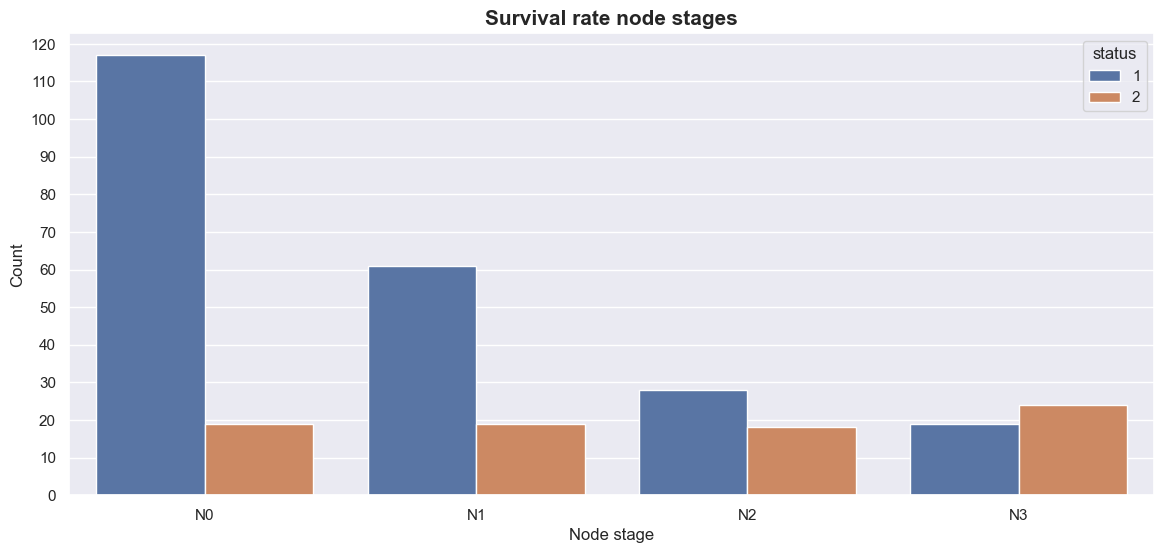

In [42]:
plt.figure(figsize=(14,6))

ax = sns.countplot(data=hm.sort_values("stages"), x="stages", hue="status")
plt.title("Survival rate node stages", fontsize=15, weight="bold")
plt.xlabel("Node stage")
plt.ylabel("Count")
plt.yticks(ticks=range(0, 125, 10))

plt.show()

### Insights

- Operations had higher success rates when the number of affected nodes was low.
- Nodes with a count greater than 15 are considered outliers in the positively skewed distribution, specifically when the survival status is 1.
- Surgery was 86% effective for patients at node-stage N0.
- For patients at node-stage N1, surgery had a 75% success rate.
- As the node-stage advances, the survival rate decreases. Surgery is only 44% effective for patients at node-stage N3.

## Age vs Nodes

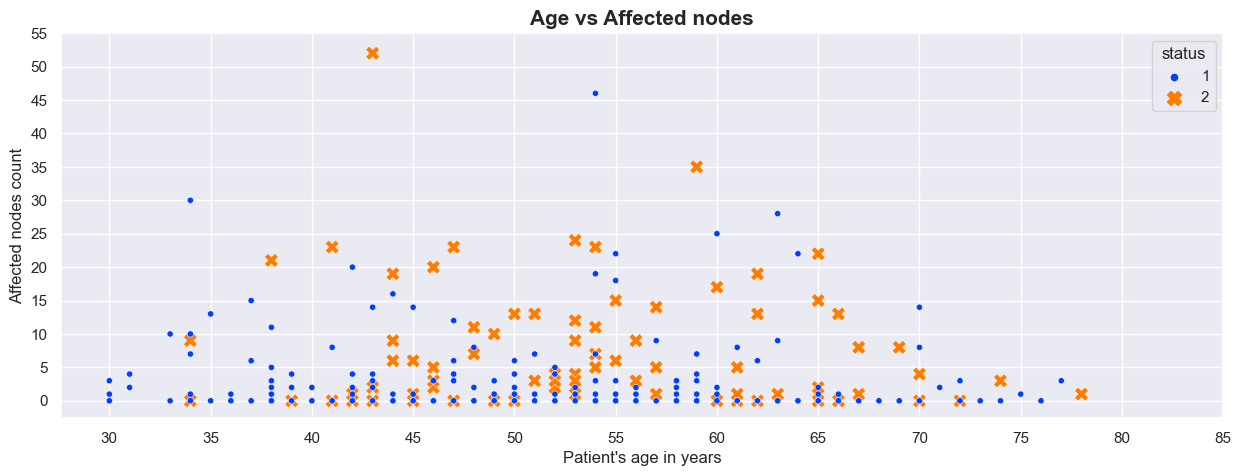

In [43]:
plt.figure(figsize=(15,5))

sns.scatterplot(
        data=hm,
        x="age",
        y="nodes",
        hue="status",
        palette="bright",
        style="status",
        size="status",
        markers=["o", "X"],
        sizes=(100, 20),
    )
plt.title("Age vs Affected nodes" , fontsize=15, weight="bold")
plt.xlabel("Patient's age in years")
plt.ylabel("Affected nodes count")
plt.xticks(ticks=range(30, 90, 5))
plt.yticks(ticks=range(0, 60, 5))

plt.show()

### Insights
- In certain instances, surgery did not yield successful outcomes when no lymph nodes were involved. 
- There is a significant overlap between individuals who passed away and those who survived, with no strong correlations observed among the factors, making it difficult to draw any conclusive inferences. 
- There were cases where surgery was successful despite an unusually high number of lymph nodes being affected. 
- Younger patients exhibit a higher likelihood of survival compared to older patients, even when the number of affected lymph nodes is higher.

### Age groups vs node count¶
**Let's compare younger and older patients based on survival rates. We'll split the dataset at around age 40, where the mortality rate begins to rise.**

In [9]:
split_age = 40

hm_group_1 = hm.loc[hm["age"] <= split_age] # younger patients
hm_group_2 = hm.loc[hm["age"] > split_age] # older patients
age_groups = [hm_group_1, hm_group_2]

print(hm_group_1.shape[0], hm_group_2.shape[0])


43 262


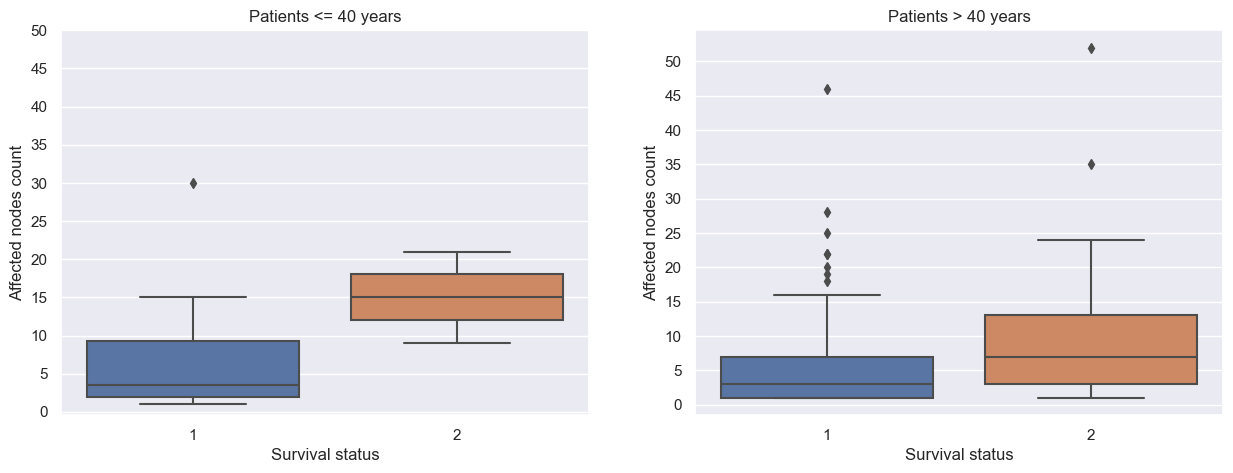

In [44]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

for i, hm in enumerate(age_groups):
    sns.boxplot(data=hm[hm["nodes"] > 0], x="status", y="nodes", ax=ax[i])
    
    op = ["<=", ">"][i]
    ax[i].set_title(f"Patients {op} {split_age} years")
    ax[i].set_xlabel("Survival status")
    ax[i].set_ylabel("Affected nodes count")
    ax[i].set_yticks(ticks=range(0,55,5))
    
plt.show()

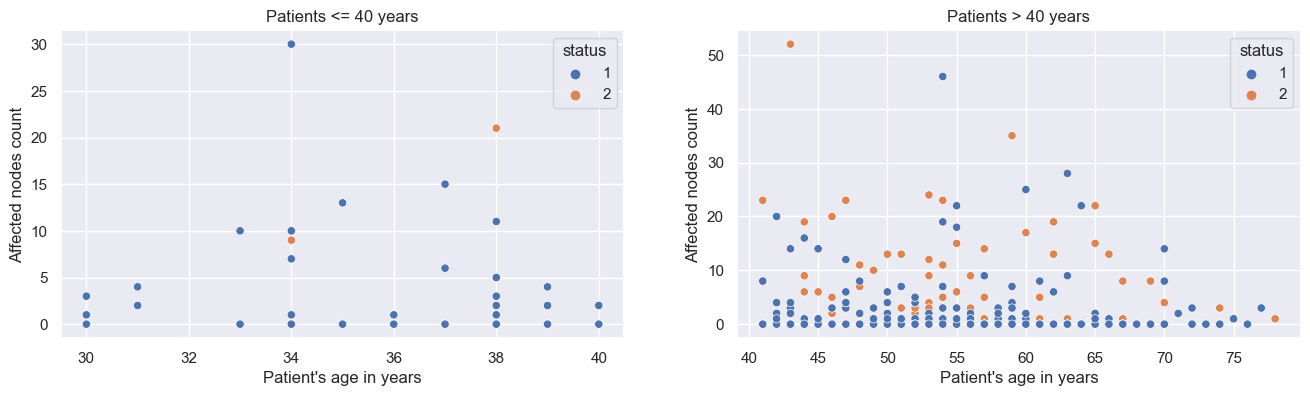

In [45]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

for i, hm in enumerate(age_groups):
    sns.scatterplot(data=hm, x="age", y="nodes", hue="status", ax=ax[i])
    
    op = ["<=", ">"][i]
    ax[i].set_title(f"Patients {op} {split_age} years")
    ax[i].set_xlabel("Patient's age in years")
    ax[i].set_ylabel("Affected nodes count")
    
plt.show()

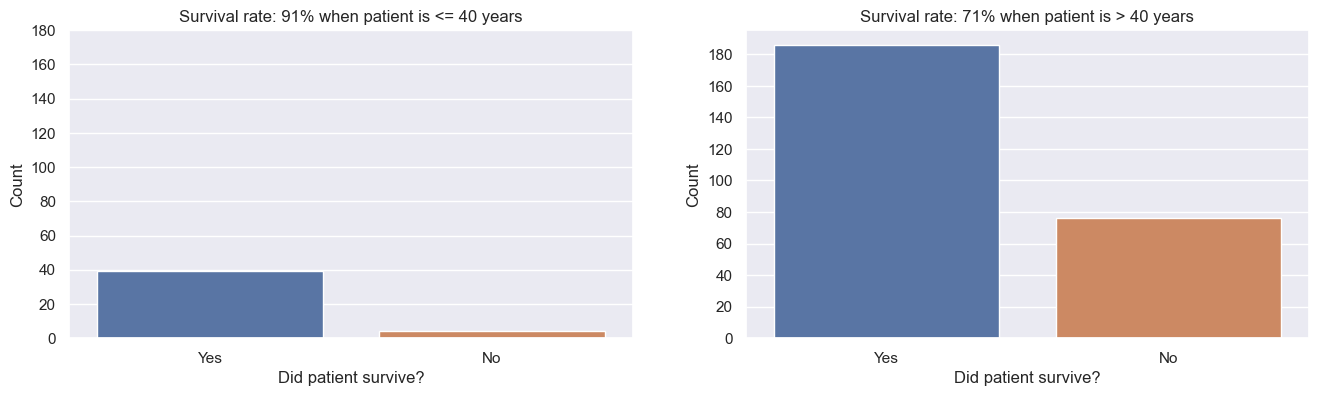

In [46]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

for i, hm in enumerate(age_groups):
    sns.countplot(data=hm, x="status", ax=ax[i])
    
    survived, deceased =  [grp.shape[0] for _, grp in hm.groupby("status")]
    op = ["<=", ">"][i]
    p = round(survived / hm.shape[0] * 100)
    
    ax[i].set_title(f"Survival rate: {p}% when patient is {op} {split_age} years")
    ax[i].set_xlabel("Did patient survive?")
    ax[i].set_ylabel("Count")
    ax[i].set_xticks(ticks=[0, 1])
    ax[i].set_xticklabels(labels=["Yes", "No"])
    ax[i].set_yticks(ticks=range(0, 190, 20))
    
plt.show()

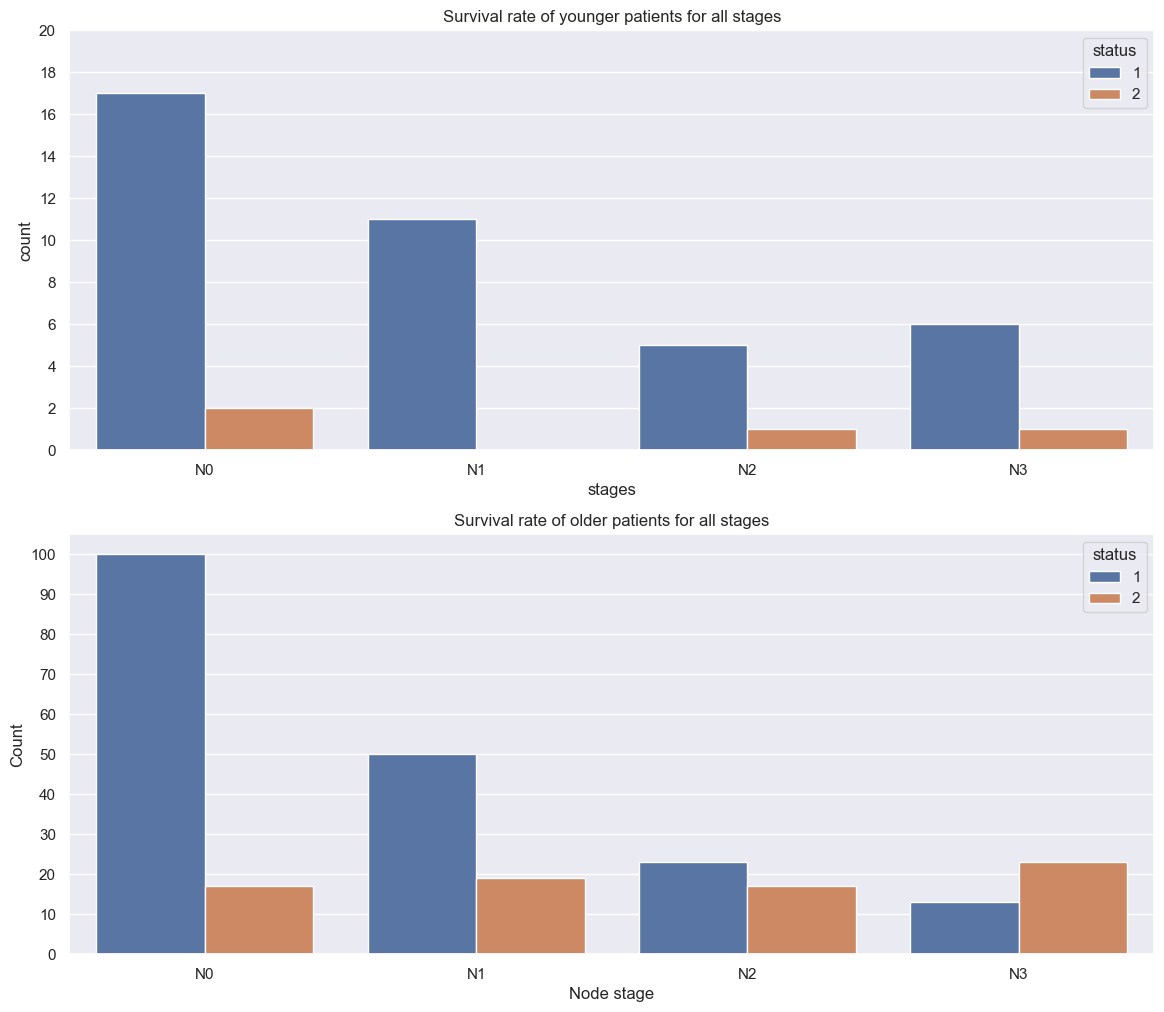

In [47]:
fig, ax = plt.subplots(2,1, figsize=(14,12), sharey=False)
titles = ["Survival rate of younger patients for all stages", "Survival rate of older patients for all stages"]
ticks = [range(0,21,2), range(0,110,10)]

for i, hm in enumerate(age_groups):
    sns.countplot(data=hm, x="stages", hue="status", order=["N0", "N1", "N2", "N3"], ax=ax[i])
    ax[i].set_title(titles[i])
    plt.xlabel("Node stage")
    plt.ylabel("Count")
    ax[i].set_yticks(ticks=ticks[i])
    
plt.show()

### Insights
- Patients aged 40 or below have a higher survival rate compared to older patients.   
1.Operations performed on patients aged 40 or below are effective in 90% of the cases.  
2.Operations performed on patients above 40 have a 71% success rate.  

- It is important to note that these conclusions should be interpreted with caution due to the limited number of records available. There are only 42 records for patients aged 40 or below and 263 records for patients above 40, which limits the reliability of the findings.

- The lower number of records for younger patients can be attributed to the fact that breast cancer is more commonly observed in females over the age of 45. Therefore, the dataset is skewed towards older patients.

- When comparing the survival rates of patients at different stages, both younger and older patients diagnosed with stage N0 and N1 exhibit high survival rates.

- Interestingly, younger patients have a higher survival rate than older patients in more advanced stages of breast cancer.

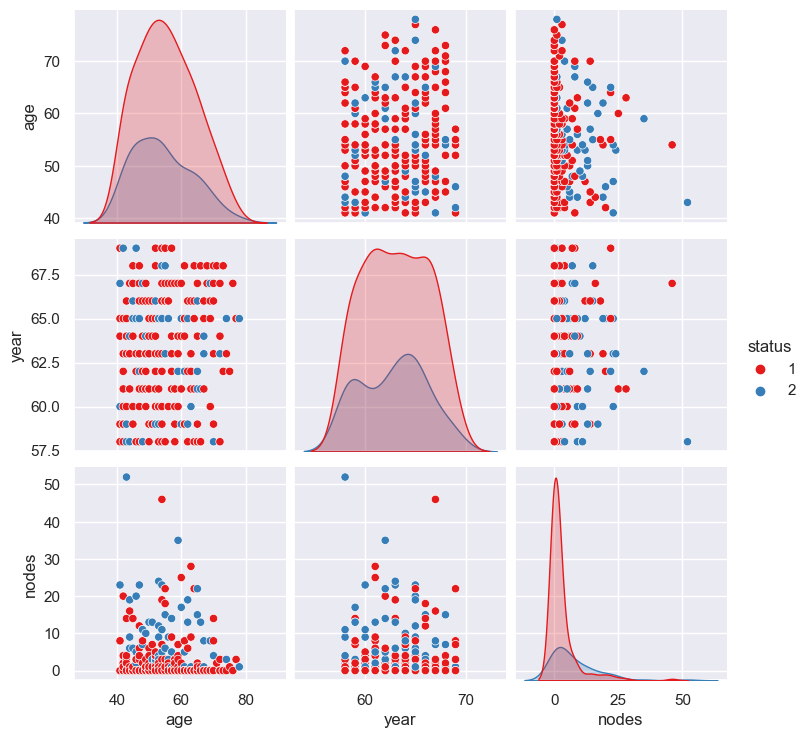

In [48]:
sns.pairplot(hm,hue = "status", palette='Set1')

## Insights
- The dataset is small, and hence no clear signs of correlation between any two features.

## Conclusion

- **The effectiveness of operations differs based on the patient's age, with a 90% success rate for younger patients (40 years or under) compared to 71% for older patients.**  
- **Younger patients have higher survival rates across all node stages (N0-N3).**  
- **Younger patients have a greater chance of surviving beyond 5 years after an operation, regardless of the node stage.**  
- **Older patients are more impacted by the number of positive axillary nodes, particularly those diagnosed with stage N3 cancer, who face a higher likelihood of mortality.**  
- **Survival rates decrease as the number of positive nodes increases for all patients.**  
- **N0 and N1 stages have relatively lower fatality compared to N2 and N3 stages.**  
- **For patients without affected axillary nodes (N0), operations have an 86% success rate, indicating that 86 out of 100 patients diagnosed in stage N0 survive beyond 5 years.**  
- **For patients with positive axillary nodes (N1-N3), operations have a 64% success rate, meaning that 64 out of 100 patients diagnosed with stage N1-N3 breast cancer survive beyond 5 years.**  
- **The number of operations remained relatively stable from 1958 to 1967, with a sharp decrease of approximately 50% in 1968 and 1969.**  
- **The impact of early breast cancer awareness on the need for surgery remains inconclusive.**  
- **Distinguishable groups can be identified based on the interquartile range (IQR) of younger patients with an effective operation compared to those with an ineffective operation.**  